<a href="https://colab.research.google.com/github/pjcroxas/Remote-Sensing/blob/main/05_Multispectral_Remote_Sensing_Data_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Lesson 1. Learn to Use NAIP Multiband Remote Sensing Images in Python
<hr>



> The National Agriculture Imagery Program (NAIP) acquires aerial imagery during the agricultural growing seasons in the continental U.S. A primary goal of the NAIP program is to make digital ortho photography available to governmental agencies and the public within a year of acquisition.

> NAIP is administered by the USDA’s Farm Service Agency (FSA) through the Aerial Photography Field Office in Salt Lake City. This “leaf-on” imagery is used as a base layer for GIS programs in FSA’s County Service Centers, and is used to maintain the Common Land Unit (CLU) boundaries. – USDA NAIP Program

NAIP is a great source of high resolution imagery across the United States. NAIP imagery is often collected with just a red, green and Blue band. However, some flights include a near infrared band which is very useful for quantifying vegetation cover and health.


In [ ]:
!pip install earthpy
!pip install rioxarray

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 4.5 MB/s 
     |████████████████████████████████| 1.0 MB 31.9 MB/s 
     |████████████████████████████████| 19.3 MB 1.2 MB/s 
     |████████████████████████████████| 6.3 MB 50.2 MB/s 
     |████████████████████████████████| 16.7 MB 30.9 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 47 kB 2.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done


In [ ]:
import os
import geopandas as gpd
import numpy as np
import rioxarray as rxr
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
import matplotlib.pyplot as plt

# Get the data
data = et.data.get_data("cold-springs-fire")

# Set working directory
os.chdir(os.path.join(et.io.HOME, 'earth-analytics', 'data'))

plt.rcParams['figure.figsize'] = (15,8)
plt.rcParams['axes.titlesize'] = 20

In [ ]:
# Read file
naip_csf_path = os.path.join("cold-springs-fire",
                             "naip",
                             "m_3910505_nw_13_1_20150919",
                             "crop",
                             "m_3910505_nw_13_1_20150919_crop.tif")

naip_csf = rxr.open_rasterio(naip_csf_path, masked=True)
naip_csf

In [ ]:
naip_csf.shape

Just like you’ve done before, you can plot a single band in the NAIP raster using `imshow()`. However, now that you have multiple layers or bands, you need to tell `imshow()` what layer you wish to plot. Use `arrayname[0]` to plot the first band of the image.

In [ ]:
fig, ax = plt.subplots()
ax.imshow(naip_csf[0],
          cmap="Greys_r")
ax.set_title("NAIP RGB Imagery Band 1 Red \nCold Springs Fire Scar")
ax.set_axis_off()
plt.show()

<small>Plot showing band one (red) of the NAIP data from 2015.

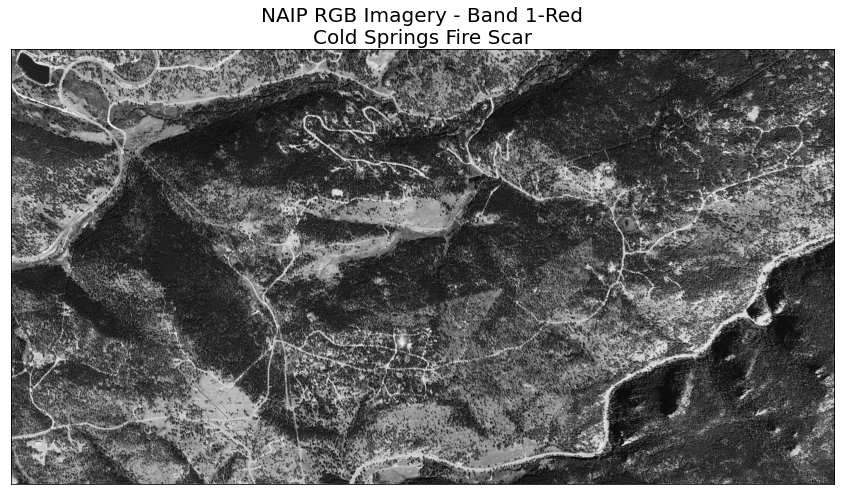

In [ ]:
# Plot using earthy.plot plot_bands() function

ep.plot_bands(naip_csf[0],
        title="NAIP RGB Imagery - Band 1-Red\nCold Springs Fire Scar",
        cbar=False, figsize=(15,8))

plt.show()

In [ ]:
naip_csf.band

<xarray.DataArray 'band' (band: 4)>
array([1, 2, 3, 4])
Coordinates:
  * band         (band) int64 1 2 3 4
    spatial_ref  int64 0

Look closely at the `.band` element of your raster. Note that now, there are four bands instead of one. This is because you have multiple bands in your raster, one for each ‘color’ or type of light collected by the camera. For NAIP data you have red, green, blue and near infrared bands. When you worked with the lidar rasters in week 2 your count was 1 as a DSM or DTM is only composed of one band.

In [ ]:
# Image Raster Data Values
print(naip_csf.min())
print(naip_csf.max())

This raster contains values between 0 and 255. These values represent degrees of brightness associated with the image band. In the case of a RGB image (red, green and blue), band 1 is the red band. When we plot the red band, larger numbers (towards 255) represent pixels with more red in them (a strong red reflection). Smaller numbers (towards 0) represent pixels with less red in them (less red was reflected).

To plot an RGB image, we mix red + green + blue values, using the ratio of each. The ratio of each color is determined by how much light was recorded (the reflectance value) in each band. This mixture creates one single color that, in turn, makes up the full color image - similar to the color image that your camera phone creates.

**8 vs 16 Bit Images**
<hr>

It’s important to note that this image is an 8 bit image. This means that all values in the raster are stored within a range of 0:255. This differs from a 16-bit image, in which values can be stored within a range of 0:65,535.

In these lessons, you will work with 8-bit images. For 8-bit images, the brightest whites will be at or close to 255. The darkest values in each band will be closer to 0.


In [ ]:
# Plot a specific band
ep.plot_bands(naip_csf[1],
        title="RGB Imagery - Band 2 - Green\nCold Springs Fire Scar",
        cbar=False, figsize=(15,8))
plt.show()

**Rasters and Numpy Arrays - A Review**
<hr>

Remember that when you import a raster dataset into Python, the data are converted to an xarray object. A numpy array has no inherent spatial information attached to it, nor does an xarray object. The data are just a matrix of values. This makes processing the data fast.

The spatial information for the raster is stored in a .rio attribute which is available if you import rioxarray in your workflow. This rio attribute allows you to export the data as a geotiff or other spatial format.



**Plot Raster Band Images**

Next plot each band in the raster. This is another intermediate step (like plotting histograms) that you might want to do when you first explore and open your data. You will not need this for your homework but you might want to do it to explore other data that you use in your career. Earthpy contains a plot_bands() function that allows you to quickly plot each band individually.

Similar to plotting a single band, in each band “color”, the brightest pixels are lighter in color or white representing a stronger reflectance for that color on that pixel. The darkest pixels are darker to black in color representing less reflectance of that color in that pixel.

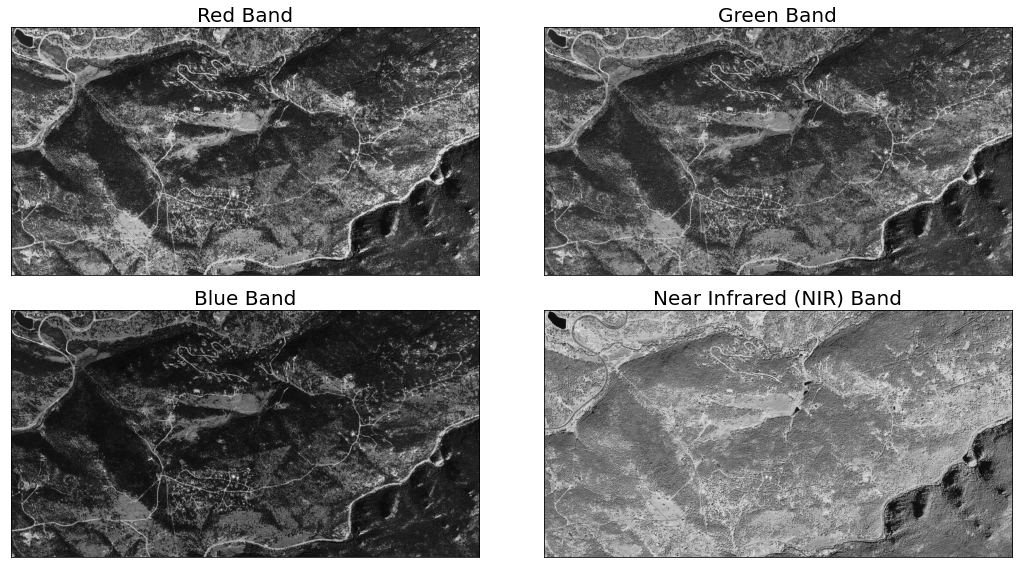

In [ ]:
titles = ["Red Band", "Green Band", "Blue Band", "Near Infrared (NIR) Band"]

ep.plot_bands(naip_csf,
              figsize=(15,8),
              cols=2,
              title=titles,
              cbar=False)

plt.show()

**Plot RGB Data**

In [ ]:
# Plotting the Red, Blue, Band
ep.plot_rgb(naip_csf.values,
            rgb=[0,1,2],
            title="RGB Composite Image - NAIP",
            figsize=(15,8))

plt.show()

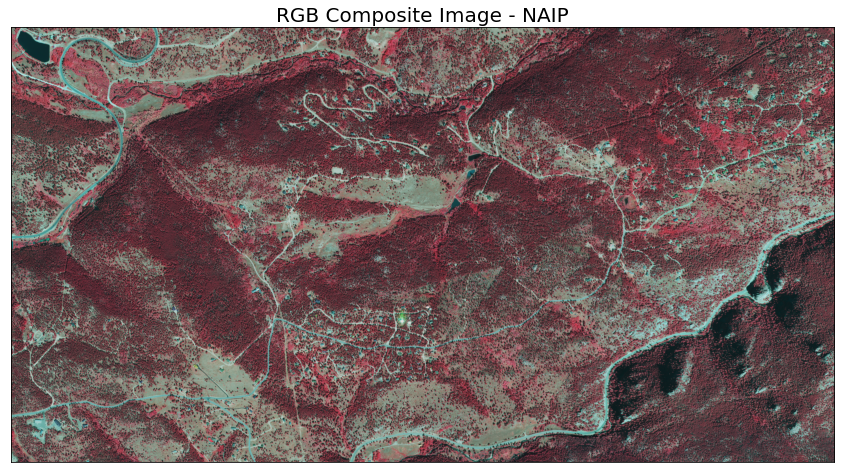

In [ ]:
# Plot NIR
ep.plot_rgb(naip_csf.values,
            rgb=[3,0,1],
            title="RGB Composite Image - NAIP",
            figsize=(15,8))

plt.show()

**Image Strech To Increase Contrast**

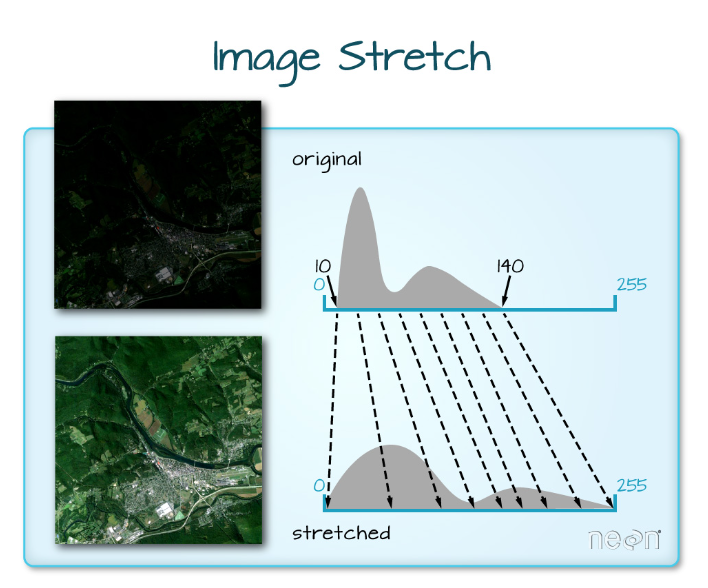

<small> When the range of pixel brightness values is closer to 0, a darker image is rendered by default. You can stretch the values to extend to the full 0-255 range of potential values to increase the visual contrast of the image.

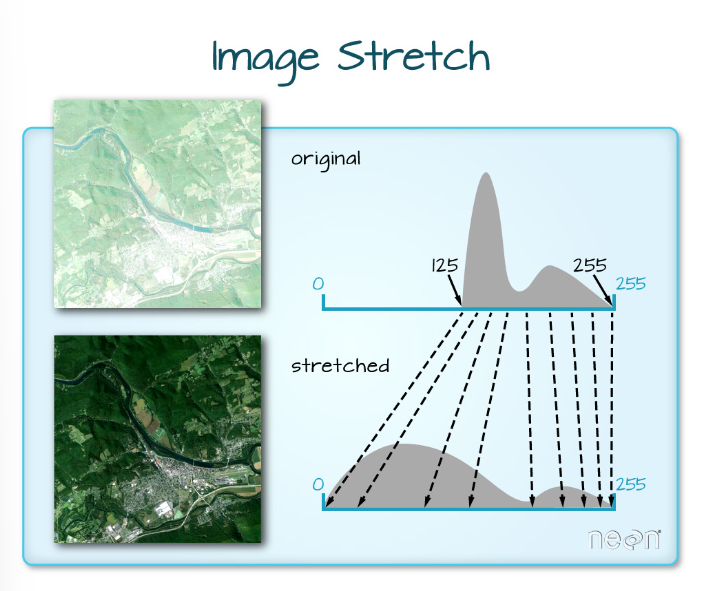

<small>When the range of pixel brightness values is closer to 255, a lighter image is rendered by default. You can stretch the values to extend to the full 0-255 range of potential values to increase the visual contrast of the image.

Below you use the skimage package to contrast stretch each band in your data to make the whites more bright and the blacks more dark.

In the example below you only stretch bands 0,1 and 2 which are the RGB bands. To begin,

1. preallocate an array of zeros that is the same shape as your numpy array.
2. then look through each band in the image and rescale it.

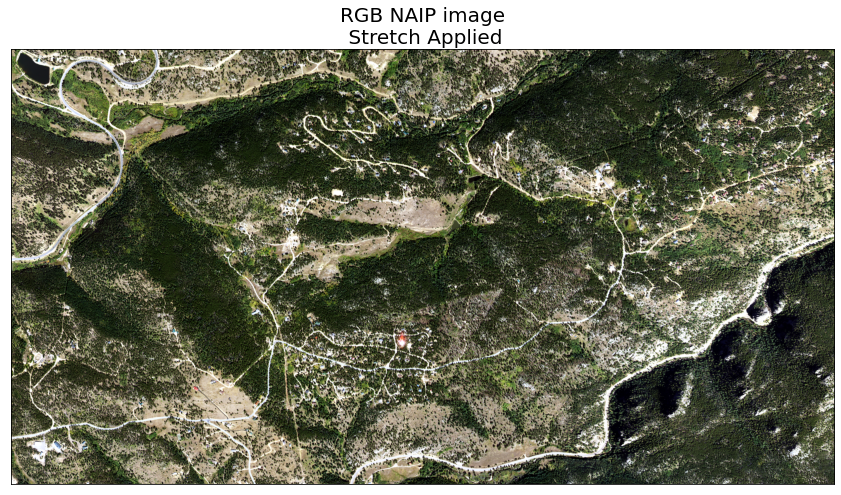

In [ ]:
band_indices = [0,1,2]

# Apply stretch using the earthpy plot_rgb function
ep.plot_rgb(naip_csf.values,
            rgb=band_indices,
            title="RGB NAIP image\n Stretch Applied",
            figsize=(15,8),
            stretch=True)

plt.show()

**Multiband Raster Histograms**
<hr>

Just like you did with single band rasters, you can view a histogram of each band in your data using matplotlib. Below, you loop through each band or layer in the number array and plot the distribution of reflectance values.

You can use the `ep.hist()` function in earthpy to plot histograms for all bands in your raster. hist() accepts several key arguments including

- arr: a numpy array in rasterio band order (bands first)
- colors: a list of colors to use for each histogram.
- title: plot titles to use for each histogram.
- cols: the number of columns for the plot grid.




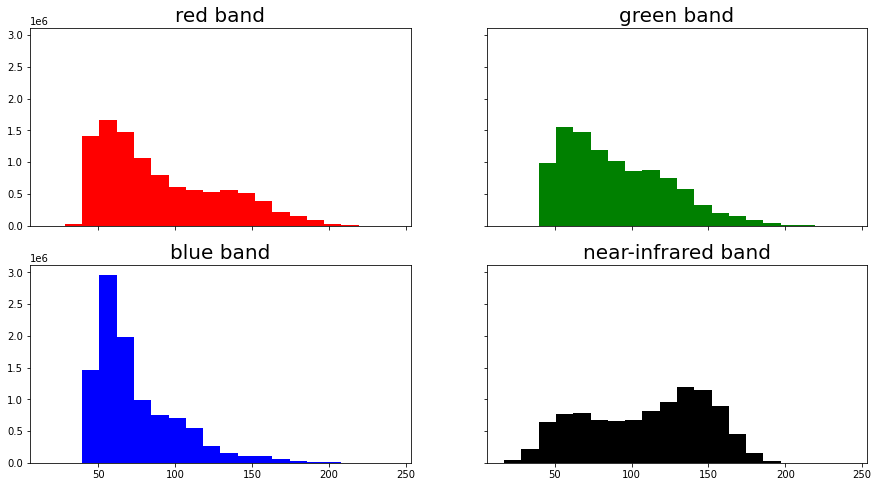

In [ ]:
colors = ["r", "g", "b", "k"]
titles = ['red band', 'green band', 'blue band', 'near-infrared band']

ep.hist(naip_csf.values,
        colors=colors,
        title=titles,
        cols=2,
        figsize=(15,8))

plt.show()

### Lesson 2. LANDSAT Data in Open Source Python

In [ ]:
import os
from glob import glob

import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import xarray as xr
import rioxarray as rxr
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
import pprint

# Download data and set working directory
data = et.data.get_data("cold-springs-fire")
os.chdir(os.path.join(et.io.HOME,
                      "earth-analytics",
                      "data"))

In [ ]:
# Get list of all pre-cropped data and sort the data

# Create the path to your data
landsat_post_fire_path = os.path.join("cold-springs-fire",
                                      "landsat_collect",
                                      "LC080340322016072301T1-SC20180214145802",
                                      "crop")

# Generate a list of tif files
post_fire_paths = glob(os.path.join(landsat_post_fire_path,
                                        "*band*.tif"))

# Sort the data to ensure bands are in the correct order
post_fire_paths.sort()
pprint.pprint(post_fire_paths)

['cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band1_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band2_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band3_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band4_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band5_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band6_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band7_crop.tif']


In [ ]:
# Open a single band without squeeze - notice the first dimension is 1
band_1 = rxr.open_rasterio(post_fire_paths[0], masked=True)
band_1.shape

(1, 177, 246)

In [ ]:
# Open a single band using squeeze notice there are only 2 dimensions here
# when you use squeeze
band_1 = rxr.open_rasterio(post_fire_paths[0], masked=True).squeeze()
band_1.shape

(177, 246)

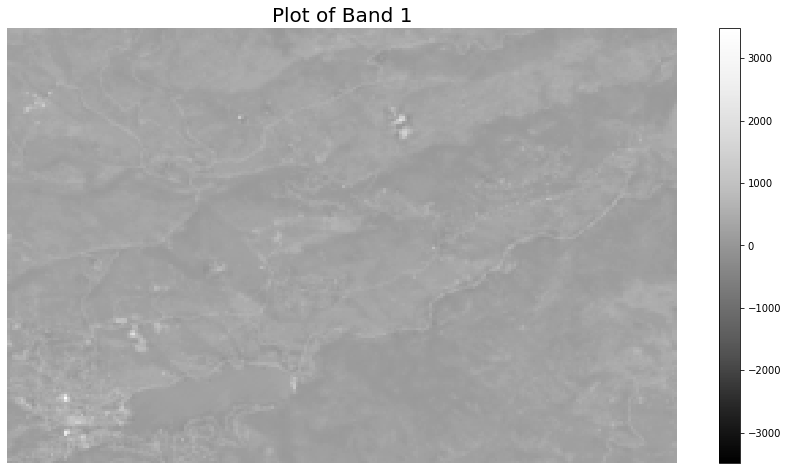

In [ ]:
# Plot the data
f, ax=plt.subplots()
band_1.plot.imshow(ax=ax,
                  cmap="Greys_r")
ax.set_axis_off()
ax.set_title("Plot of Band 1")
plt.show()

In [ ]:
def open_clean_bands(band_path):
    """A function that opens a Landsat band as an (rio)xarray object

    Parameters
    ----------
    band_path : list
        A list of paths to the tif files that you wish to combine.

    Returns
    -------
    An single xarray object with the Landsat band data.

    """

    return rxr.open_rasterio(band_path, masked=True).squeeze()

In [ ]:
all_bands = []
for i, aband in enumerate(post_fire_paths):
  all_bands.append(open_clean_bands(aband))
  all_bands[i]["band"] = i+1

In [ ]:
# OPTIONAL: Turn list of bands into a single xarray object
landsat_post_fire_xr = xr.concat(all_bands, dim="band")
landsat_post_fire_xr

<xarray.DataArray (band: 7, y: 177, x: 246)>
array([[[ 446.,  476.,  487., ...,  162.,  220.,  260.],
        [ 393.,  457.,  488., ...,  200.,  235.,  296.],
        [ 364.,  393.,  388., ...,  246.,  298.,  347.],
        ...,
        [ 249.,  283.,  363., ...,  272.,  268.,  284.],
        [ 541.,  474.,  364., ...,  260.,  269.,  285.],
        [ 219.,  177.,  250., ...,  271.,  271.,  286.]],

       [[ 515.,  547.,  572., ...,  181.,  233.,  261.],
        [ 440.,  519.,  571., ...,  211.,  251.,  322.],
        [ 411.,  460.,  449., ...,  264.,  326.,  387.],
        ...,
        [ 387.,  326.,  427., ...,  288.,  278.,  301.],
        [ 554.,  654.,  433., ...,  276.,  276.,  293.],
        [ 291.,  174.,  291., ...,  292.,  290.,  304.]],

       [[ 782.,  772.,  843., ...,  335.,  390.,  411.],
        [ 684.,  771.,  836., ...,  363.,  412.,  511.],
        [ 656.,  725.,  706., ...,  425.,  518.,  599.],
        ...,
...
        ...,
        [1900., 1917., 2076., ..., 1722., 1891., 1890.],
        [1779., 1893., 1983., ..., 1645., 1847., 2090.],
        [1553., 1440., 1587., ..., 1562., 1689., 1964.]],

       [[2864., 2974., 3108., ...,  983., 1195., 1271.],
        [2527., 2827., 3008., ..., 1132., 1293., 1546.],
        [2141., 2427., 2433., ..., 1324., 1652., 1922.],
        ...,
        [1662., 1757., 1922., ..., 1463., 1472., 1519.],
        [1786., 1532., 1554., ..., 1374., 1423., 1450.],
        [1071.,  943.,  975., ..., 1524., 1461., 1518.]],

       [[1920., 1979., 2098., ...,  537.,  660.,  687.],
        [1505., 1863., 1975., ...,  651.,  747.,  924.],
        [1240., 1407., 1391., ...,  769., 1018., 1189.],
        ...,
        [1216., 1190., 1398., ...,  877.,  890.,  928.],
        [1517., 1184., 1078., ...,  846.,  810.,  820.],
        [ 660.,  593.,  623., ...,  984.,  909.,  880.]]], dtype=float32)
Coordinates:
  * band         (band) int64 1 2 3 4 5 6 7
  * x            (x) float64 4.557e+05 4.557e+05 4.557e+05 ... 4.63e+05 4.63e+05
  * y            (y) float64 4.428e+06 4.428e+06 ... 4.423e+06 4.423e+06
    spatial_ref  int64 0
Attributes:
    STATISTICS_MAXIMUM:  3483
    STATISTICS_MEAN:     297.16466859584
    STATISTICS_MINIMUM:  -57
    STATISTICS_STDDEV:   119.61507774931
    scale_factor:        1.0
    add_offset:          0.0

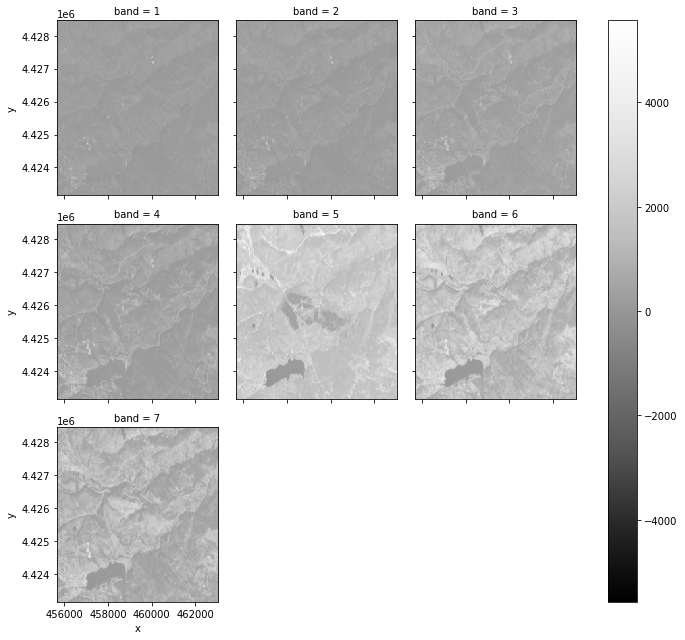

In [ ]:
landsat_post_fire_xr.plot.imshow(col="band",
                                 col_wrap=3,
                                 cmap="Greys_r")

plt.show()

**Plot RGB image of LANDSAT**

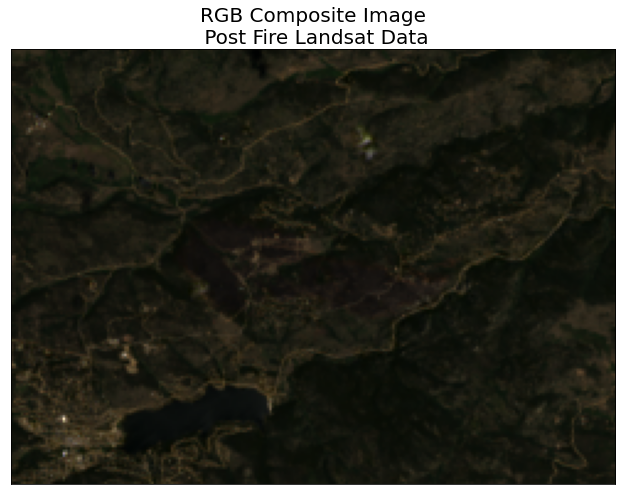

In [ ]:
ep.plot_rgb(landsat_post_fire_xr.values,
            rgb=[3,2,1],
            title="RGB Composite Image\n Post Fire Landsat Data",
            figsize=(15,8))

plt.show()

**Stretch**

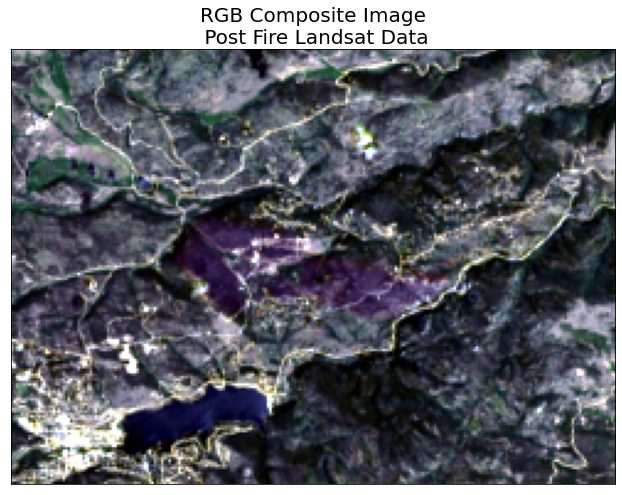

In [ ]:
ep.plot_rgb(landsat_post_fire_xr.values,
            rgb=[3,2,1],
            title="RGB Composite Image\n Post Fire Landsat Data",
            stretch=True,
            str_clip=1,
            figsize=(15,8))

plt.show()

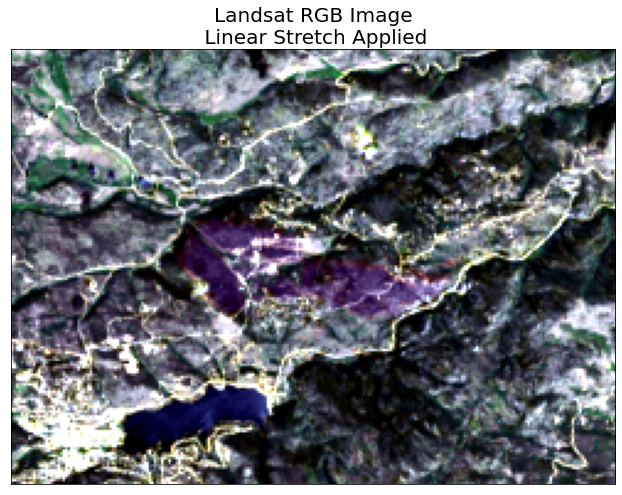

In [ ]:
# Adjust the amount of linear stretch to further brighten the image
ep.plot_rgb(landsat_post_fire_xr.values,
            rgb=[3,2,1],
            title="Landsat RGB Image\n Linear Stretch Applied",
            stretch=True,
            str_clip=4,
            figsize=(15,8))

plt.show()

**Raster Pixel Histogram**

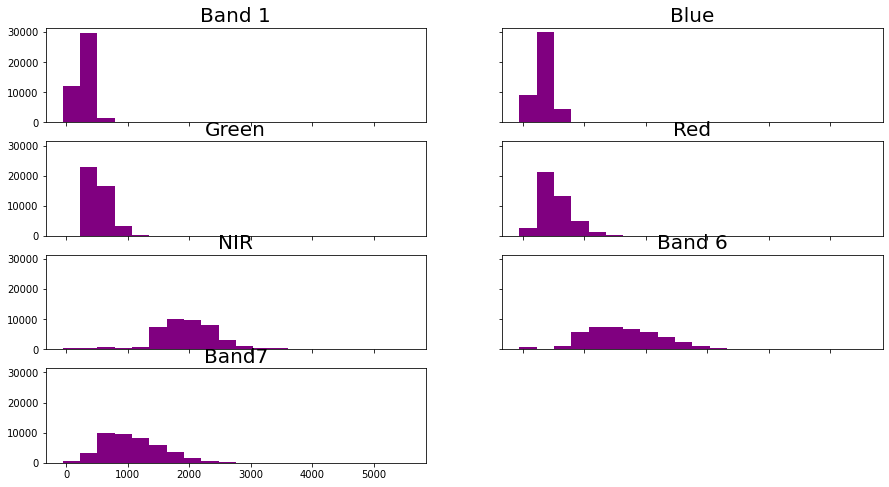

In [ ]:
# Plot all the band histrograms using earthoy
band_titles = ["Band 1",
               "Blue",
               "Green",
               "Red",
               "NIR",
               "Band 6",
               "Band7"]

ep.hist(landsat_post_fire_xr.values,
        title=band_titles,
        figsize=(15,8))

plt.show()

**Plot CIR**
<HR>
Now you’ve created a red, green blue color composite image. Remember red green and blue are colors that your eye can see.

Next, create a color infrared image (CIR) using landsat bands: 4,3,2.

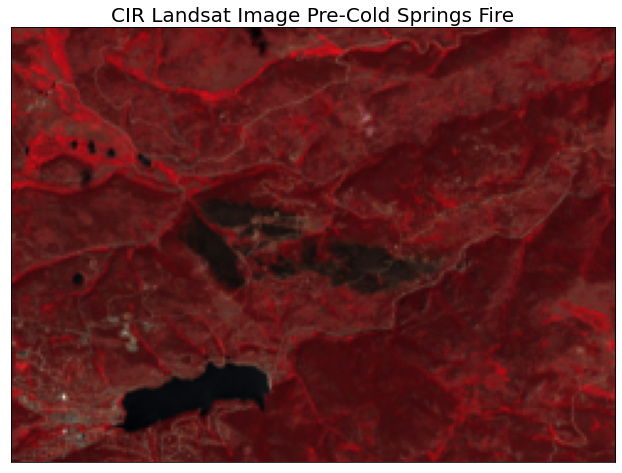

In [ ]:
ep.plot_rgb(landsat_post_fire_xr.values,
            rgb=[4,3,2],
            title="CIR Landsat Image Pre-Cold Springs Fire",
            figsize=(15,8))

plt.show()

### Lesson 2. Open and Crop Landsat Remote Sensing Data in Open Source Python
<hr>

**Open Landsat .tif Files in Python**

In [ ]:
import os
from glob import glob

import matplotlib.pyplot as plt
import geopandas as gpd
import rasterio as rio
import xarray as xr
import rioxarray as rxr
import numpy as np
import earthpy as et
import earthpy.plot as ep
import earthpy.spatial as es
from shapely.geometry import mapping

# Dowanload data and set working directory
data = et.data.get_data('cold-springs-fire')
os.chdir(os.path.join(et.io.HOME,
                      'earth-analytics',
                      'data'))

You will be working in the `landsat-collect` directory. Notice that the data in that directory are stored by individual band. Each file is a single geotiff (.tif) rather than one tif with all the bands which is what you worked with in the previous lesson with NAIP data.

**Why Are Landsat Bands Stored As Individual Files?**

Originally Landsat was stored in a file format called HDF - hierarchical data format. However that format, while extremely efficient, is a bit more challenging to work with. In recent years, USGS has started to make each band of a landsat scene available as a .tif file. This makes it a bit easier to use across many different programs and platforms.

The good news is that you already know how to work with `.tif` files in Python. You just need to learn how to batch process a series of .tif files to work with Landsat 8 Collections.

**Generate a List of Files in Python**
<hr>

To begin, explore the Landsat files in your `cs-test-landsat` directory. Start with the data:

`data/cs-test-landsat/`
Landsat scenes are large. In order to make processing your data more efficient, you can subset the data to just the parts that you need. This may include:

1. only opening bands that you need for your final analysis and
2. cropping the data if your study area is small than or not fully covered by the landsat scene extent.

For the purpose of this lesson, let’s pretend that you wish to perform an NDVI analysis of your Landsat data. You also may wish to plot Color infrared images and an RGB image. To perform this you will want to grab the following bands:

- red, green, blue and near infrared

from your data. This should be bands 2-5 following the landsat documentation.

`'LC08_L1TP_034032_20160621_20170221_01_T1_sr_band7.tif',
'LC08_L1TP_034032_20160621_20170221_01_T1.xml',
'LC08_L1TP_034032_20160621_20170221_01_T1_sr_band5.tif',
'LC08_L1TP_034032_20160621_20170221_01_T1_sr_band1.tif',
'LC08_L1TP_034032_20160621_20170221_01_T1_sr_aerosol.tif',
'LC08_L1TP_034032_20160621_20170221_01_T1_sr_band3.tif',
'LC08_L1TP_034032_20160621_20170221_01_T1_ANG.txt',
'LC08_L1TP_034032_20160621_20170221_01_T1_sr_band2.tif',
'crop',
'LC08_L1TP_034032_20160621_20170221_01_T1_sr_band4.tif',
'LC08_L1TP_034032_20160621_20170221_01_T1_sr_band6.tif',
'LC08_L1TP_034032_20160621_20170221_01_T1_pixel_qa.tif',
'LC08_L1TP_034032_20160621_20170221_01_T1_radsat_qa.tif',
'LC08_L1TP_034032_20160621_20170221_01_T1_MTL.txt'`

Notice that there are some layers that are quality assurance layers. Others have the word band in them. The layers with band in them are the reflectance data that you need to work with.

To work with these files, you will do the following:

1. You will generate a list of only the files in the directory that contain the word band in the name and that only represent the bands that you need for your analysis.
2. Crop the data to the extent of the study area.
3. OPTIONAL: stack all of the layers into one rioxarray object: Note that you may or may not wish to stack the data. If your main goal is to calculate NDVI, or some other vegetation index, then stacking may not be necessary. If you wish to create color plots of your data in RGB or CIR format, or to perform other analytics on the stacked data then it may make sense to stack the data.

You will use the `glob()` function and library to do this in Python.

In [ ]:
landsat_post_fire_path = os.path.join("cold-springs-fire",
                                      "landsat_collect",
                                      "LC080340322016072301T1-SC20180214145802",
                                      "crop")

pprint.pprint(glob(os.path.join(landsat_post_fire_path, "*")))

['cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band7_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band2_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_radsat_qa_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band4_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_aerosol_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band1_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_pixel_qa_crop.tif',
 'c

In [ ]:
# Grab bands 3 through 5
all_landsat_post_bands = glob(os.path.join(landsat_post_fire_path,
                                           "*band[2-5]*.tif"))

all_landsat_post_bands.sort()
pprint.pprint(all_landsat_post_bands)

['cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band2_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band3_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band4_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band5_crop.tif']


In the previous lesson, you created a small function that opened up a single landsat band. You will expand this function to open, crop and clean your data in this lesson.

In [ ]:
def open_clean_band(band_path):
    """A function that opens a Landsat band as an (rio)xarray object

    Parameters
    ----------
    band_path : list
        A list of paths to the tif files that you wish to combine.

    Returns
    -------
    An single xarray object with the Landsat band data.

    """

    return rxr.open_rasterio(band_path, masked=True).squeeze()

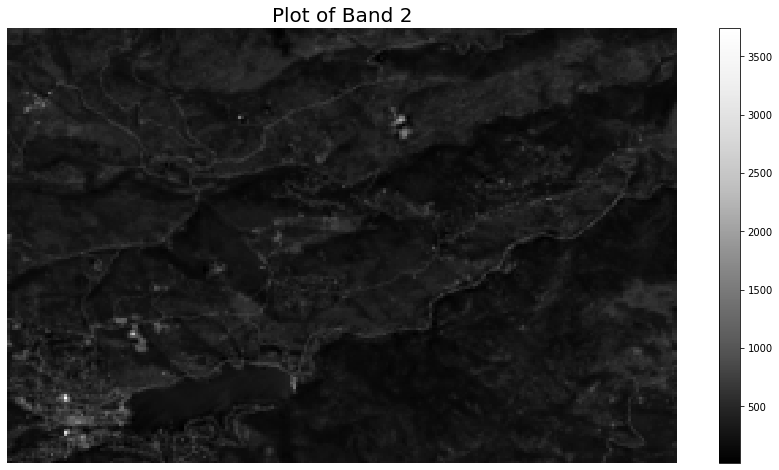

In [ ]:
landsat_post_xr = open_clean_band(all_landsat_post_bands[0])

# Plot the data
f, ax = plt.subplots()
landsat_post_xr.plot.imshow(cmap="Greys_r", ax=ax)

ax.set_title("Plot of Band 2")
ax.set_axis_off()
plt.show()

Crop a Landsat Band Using Rioxarray rio.clip()
Above you opened up and plotted a single band. Often, you want to crop your data to the spatial extent of your study area. Crop, removes data that you don’t need in your analysis (that that is outside of your area of interest). You could chose to open and crop each file individually using the `rxr.open_rasterio()` function alongside the **rioxarray** `opened_xarray.rio.clip() `function as shown below.

In order to crop a band, you need to have a

1. GeoPandas or shapely object that represents the extent of the area you want to study in the Landsat image (your crop extent).
2. The crop extent shapefile and the Landsat data need to be in the same Coordinate Reference System, or CRS.

To clip an **xarray** DataFrame to a **GeoPandas** extent, you need to create the clipped dataframe with the following syntax.

`clipped_xarray = xarray_name.rio.clip(geopandas_object_name.geometry)`

In [ ]:
# OPen up boundary extent using GeoPandas
fire_boundary_path = os.path.join("cold-springs-fire",
                                  "vector_layers",
                                  "fire-boundary-geomac",
                                  "co_cold_springs_20160711_2200_dd83.shp")

fire_boundary = gpd.read_file(fire_boundary_path)

In [ ]:
# Get the CRS of your data
landsat_crs = es.crs_check(all_landsat_post_bands[0])
print("Landsat crs is: ", landsat_crs)
print("Fire boundary crs: ", fire_boundary.crs)

Landsat crs is:  EPSG:32613
Fire boundary crs:  epsg:4269


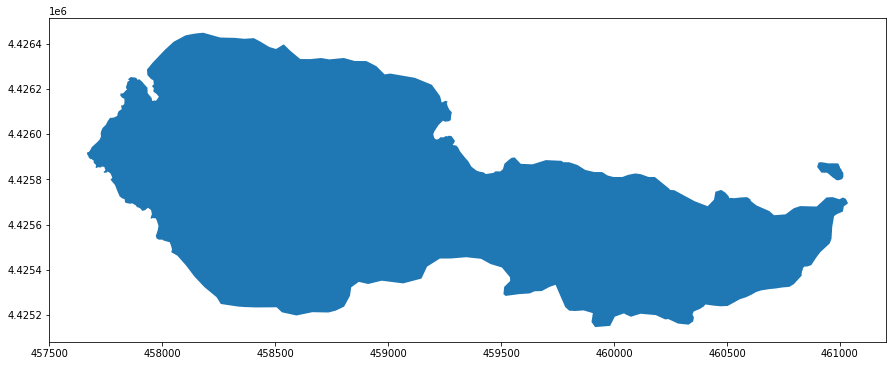

In [ ]:
# Reproject data to CRS of raster data
fire_boundary_utmz13 = fire_boundary.to_crs(landsat_crs)
fire_boundary_utmz13.plot()
plt.show()

<small> Plot of the fire boundary for he Cold Springs Fire. These data were in shapefile format and opened using Geopandas in Python.

Once the crs has been checked you can clip the data. The ideal scenario here is that you clip the data while opening it. Below you use `from_disk = True` which tells rioxarray to only open the data within the clip extent. This will speed up your workflow a bit.

In [ ]:
landsat_post_xr_clip = rxr.open_rasterio(all_landsat_post_bands[0]).rio.clip(
    fire_boundary_utmz13.geometry,
    from_disk=True).squeeze()

# Notice the x and y data dimensions of your data have changed
landsat_post_xr_clip

<xarray.DataArray (y: 44, x: 113)>
array([[-32768, -32768, -32768, ..., -32768, -32768, -32768],
       [-32768, -32768, -32768, ..., -32768, -32768, -32768],
       [-32768, -32768, -32768, ..., -32768, -32768, -32768],
       ...,
       [-32768, -32768, -32768, ..., -32768, -32768, -32768],
       [-32768, -32768, -32768, ..., -32768, -32768, -32768],
       [-32768, -32768, -32768, ..., -32768, -32768, -32768]], dtype=int16)
Coordinates:
  * x            (x) float64 4.577e+05 4.577e+05 4.577e+05 ... 4.61e+05 4.61e+05
  * y            (y) float64 4.426e+06 4.426e+06 ... 4.425e+06 4.425e+06
    band         int64 1
    spatial_ref  int64 0
Attributes:
    STATISTICS_MAXIMUM:  3743
    STATISTICS_MEAN:     337.61331587892
    STATISTICS_MINIMUM:  17
    STATISTICS_STDDEV:   139.84903539903
    scale_factor:        1.0
    add_offset:          0.0
    _FillValue:          -32768

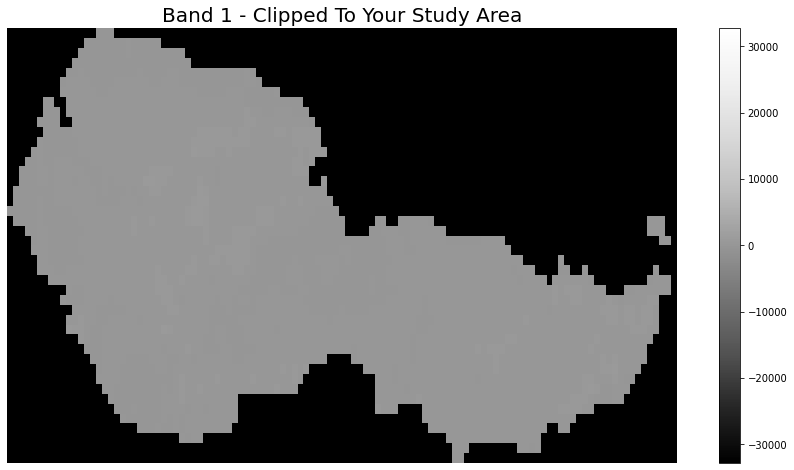

In [ ]:
f, ax = plt.subplots(figsize=(15,8))

landsat_post_xr_clip.plot.imshow(cmap="Greys_r",
                                 ax=ax)
ax.set_axis_off()
ax.set_title("Band 1 - Clipped To Your Study Area")
plt.show()

The above plot has a large amount of “black” fill around the outside representing fill values. When you clipped the data to the geometry, rioxarray filled all of the pixels outside of the geometry extent with a large negative number **-32768**.

For plotting you may wish to clean this up by masking out values.

In [ ]:
# Clean the data
valid_range = (0, 10000)
# Only run this step if a valid range tuple is provided
if valid_range:
    mask = ((landsat_post_xr_clip < valid_range[0]) | (
        landsat_post_xr_clip > valid_range[1]))
    landsat_post_xr_clip = landsat_post_xr_clip.where(
        ~xr.where(mask, True, False))

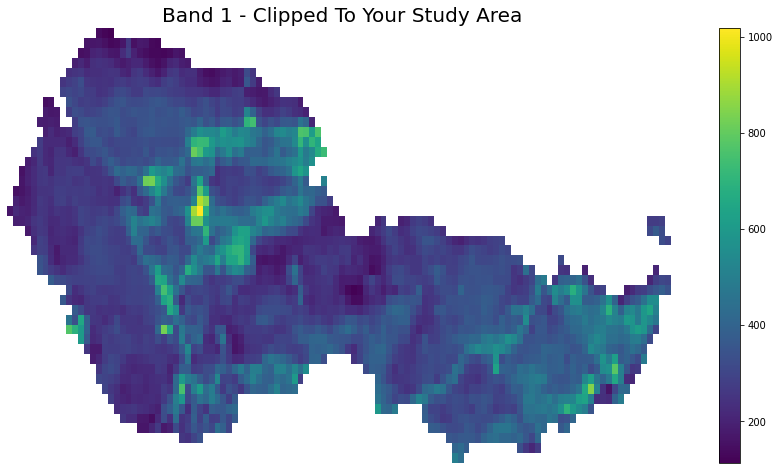

In [ ]:
f, ax = plt.subplots(figsize=(15,8))

landsat_post_xr_clip.plot.imshow(cmap="viridis",
                                 ax=ax)
ax.set_axis_off()
ax.set_title("Band 1 - Clipped To Your Study Area")
plt.show()

**A Function to Crop and Clean Landsat Data**
<hr>

It would be nice to combine all of the steps above into a single workflow that clips and cleans your landsat data. You can take the function that you started in the previous lesson and expand it to
do all of this for you.

In [ ]:
def open_clean_band(band_path, clip_extent, valid_range=None):
    """A function that opens a Landsat band as an (rio)xarray object

    Parameters
    ----------
    band_path : list
        A list of paths to the tif files that you wish to combine.

    clip_extent : geopandas geodataframe
        A geodataframe containing the clip extent of interest. NOTE: this will
        fail if the clip extent is in a different CRS than the raster data.

    valid_range : tuple (optional)
        The min and max valid range for the data. All pixels with values outside
        of this range will be masked.

    Returns
    -------
    An single xarray object with the Landsat band data.

    """

    try:
        clip_bound = clip_extent.geometry
    except Exception as err:
        print("Oops, I need a geodataframe object for this to work.")
        print(err)

    cleaned_band = rxr.open_rasterio(band_path,
                                     masked=True).rio.clip(clip_bound,
                                                           from_disk=True).squeeze()

    # Only mask the data if a valid range tuple is provided
    if valid_range:
        mask = ((landsat_post_xr_clip < valid_range[0]) | (
            landsat_post_xr_clip > valid_range[1]))
        cleaned_band = landsat_post_xr_clip.where(
            ~xr.where(mask, True, False))

    return cleaned_band

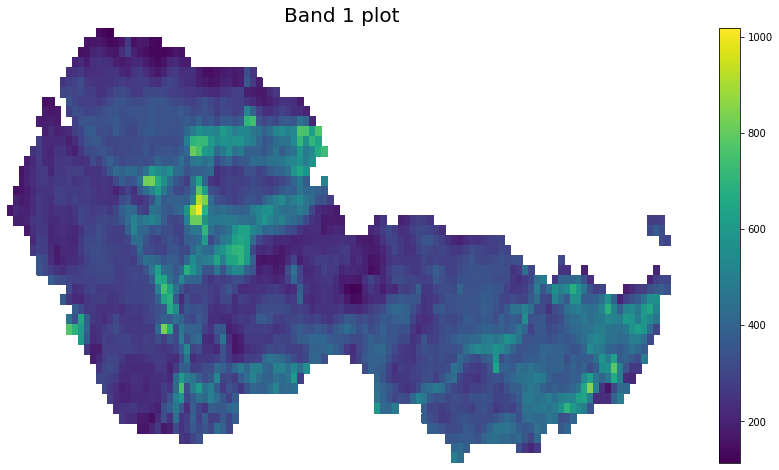

In [ ]:
cleaned_band = open_clean_band(all_landsat_post_bands[0], fire_boundary_utmz13)

f, ax = plt.subplots()
cleaned_band.plot(ax=ax)
ax.set_title("Band 1 plot")
ax.set_axis_off()
plt.show()

**Create Your Final, Automated Workflow**
<hr>


Great - you now have a workflow that opens, clips and cleans a single band. However, remember that your original goal is to open, clip and clean several
Landsat bands with the goal of calculating NDVI and producing some RGB and ColorInfrared (CIR) plots.

Below you build out the entire workflow using a loop. The vector data step is
reproduced here

In [ ]:
# Open up the boundary extent using Geopandas
fire_boundary_path = os.path.join("cold-springs-fire",
                                  "vector_layers",
                                  "fire-boundary-geomac",
                                  "co_cold_springs_20160711_2200_dd83.shp")

fire_boundary = gpd.read_file(fire_boundary_path)

In [ ]:
all_landsat_post_bands = glob(os.path.join(landsat_post_fire_path,
                                           "*band[2-5]*.tif"))
all_landsat_post_bands.sort()
all_landsat_post_bands

['cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band2_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band3_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band4_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band5_crop.tif']

In [ ]:
# Reproject your vector layer
landsat_crs = es.crs_check(all_landsat_post_bands[0])

fire_boundary_utmz13 = fire_boundary.to_crs(landsat_crs)

Loop through each band path, open the data and add it to a list.

In [ ]:
post_all_bands = []
for i, aband in enumerate(all_landsat_post_bands):
  cleaned = open_clean_band(aband, fire_boundary_utmz13)
  cleaned["band"] = i+1
  post_all_bands.append(cleaned)

In [ ]:
# Optional - Stack the data
post_fire_stack = xr.concat(post_all_bands, dim="band")
post_fire_stack

<xarray.DataArray (band: 4, y: 44, x: 113)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * x            (x) float64 4.577e+05 4.577e+05 4.577e+05 ... 4.61e+05 4.61e+05
  * y            (y) float64 4.426e+06 4.426e+06 ... 4.425e+06 4.425e+06
  * band         (band) int64 1 2 3 4
    spatial_ref  int64 0
Attributes:
    STATISTICS_MAXIMUM:  3743
    STATISTICS_MEAN:     337.61331587892
    STATISTICS_MINIMUM:  17
    STATISTICS_STDDEV:   139.84903539903
    scale_factor:        1.0
    add_offset:          0.0

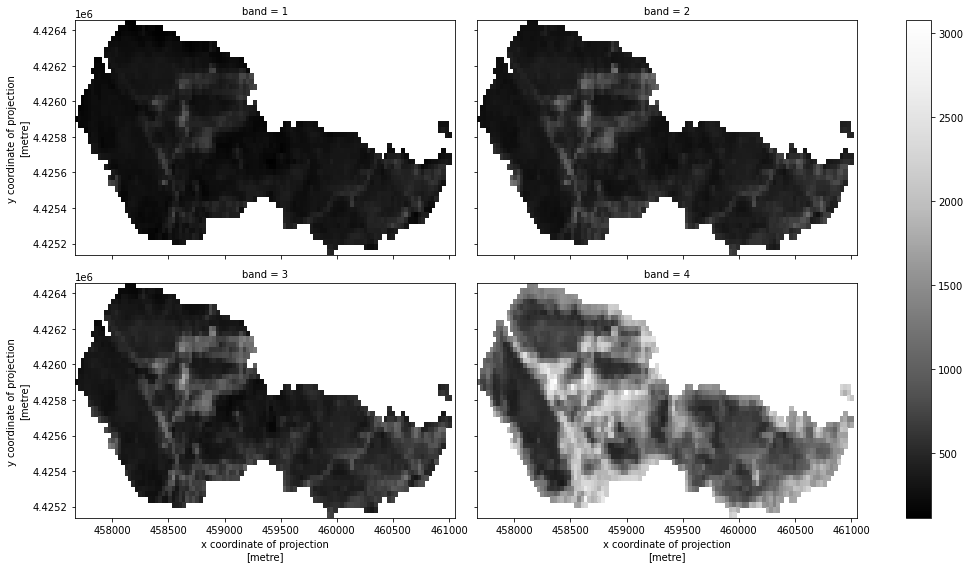

In [ ]:
# f, ax = plt.subplots(figsize=(15,8))
post_fire_stack.plot(col="band",
                     col_wrap=2,
                     cmap="Greys_r",
                     figsize=(15,8))
plt.show()

**Plot Data Using EarthPy**
To save some code, you can plot with earthpy instead. Earthpy will clean up your plot for you a bit, saving the steps of cleaning up axes and adding titles.

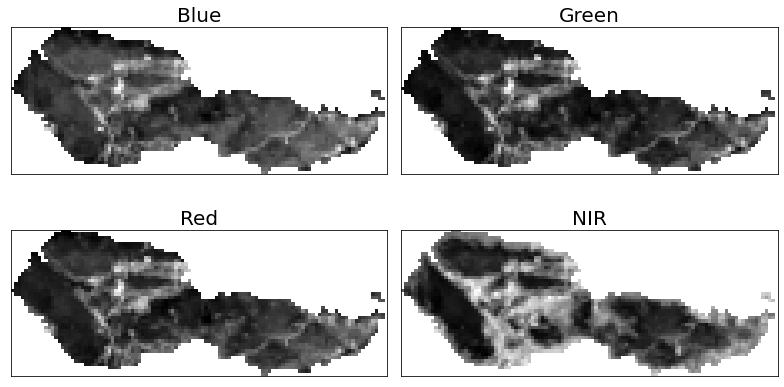

In [ ]:
# Plot using earthpy
band_title = [
              "Blue",
              "Green",
              "Red",
              "NIR"
              ]

ep.plot_bands(post_fire_stack,
              figsize=(11,6),
              cols=2,
              title=band_title,
              cbar=False)

plt.show()

<small>Plot of all clipped Landsat 8 bands with the missing data values masked. This plot uses earthpy.plot_bands

**Create an RGB Plot of your Landsat Raster Data**
If you want to plot your data as a color composit RGB map, you can use earthpy’s plot_rgb() function.

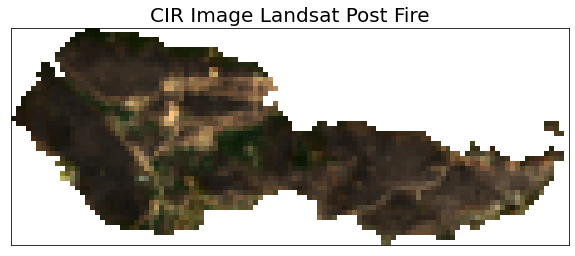

In [ ]:
# Plot array
ep.plot_rgb(post_fire_stack,
            rgb=[2,1,0],
            title="CIR Image Landsat Post Fire")

plt.show()

In [ ]:
def process_bands(paths, crop_layer, stack=False):
    """
    Open, clean and crop a list of raster files using rioxarray.

    Parameters
    ----------
    paths : list
        A list of paths to raster files that could be stacked (of the same
        resolution, crs and spatial extent).

    crop_layer : geodataframe
        A geodataframe containing the crop geometry that you wish to crop your
        data to.

    stack : boolean
        If True, return a stacked xarray object. If false will return a list
        of xarray objects.

    Returns
    -------
        Either a list of xarray objects or a stacked xarray object
    """

    all_bands = []
    for i, aband in enumerate(paths):
        cleaned = open_clean_band(aband, crop_layer)
        cleaned["band"] = i+1
        all_bands.append(cleaned)

    if stack:
        print("I'm stacking your data now.")
        return xr.concat(all_bands, dim="band")
    else:
        print("Returning a list of xarray objects.")
        return all_bands


In [ ]:
# Open up boundary extent using GeoPandas
fire_boundary_path = os.path.join("cold-springs-fire",
                                  "vector_layers",
                                  "fire-boundary-geomac",
                                  "co_cold_springs_20160711_2200_dd83.shp")

fire_boundary = gpd.read_file(fire_boundary_path)

# Get a list of required bands - bands 2 through 5
all_landsat_post_bands = glob(os.path.join(landsat_post_fire_path,
                                           "*band[2-5]*.tif"))
all_landsat_post_bands.sort()

# Get CRS of landsat data and reproject fire boundary
landsat_crs = es.crs_check(all_landsat_post_bands[0])
fire_boundary_utmz13 = fire_boundary.to_crs(landsat_crs)

In [ ]:
# Process all bands
post_fire_stack = process_bands(all_landsat_post_bands,
                                fire_boundary_utmz13,
                                stack=True)
post_fire_stack.shape

I'm stacking your data now.


(4, 44, 113)

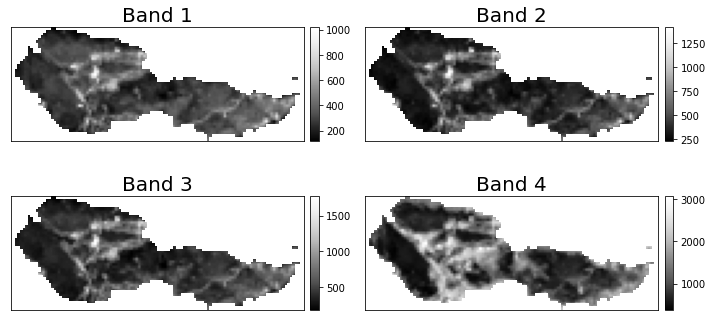

<Figure size 1080x576 with 0 Axes>

In [ ]:
# Plot using earthpy
band_titles = ["Blue Band",
               "Green Band",
               "Red Band",
               "NIR Band"]

# Plot the final data
ep.plot_bands(post_fire_stack,
             cols=2,
             figsize=(10,5))
plt.suptitle("Cleaned and Cropped Landsat Bands")
plt.show()